---
### **Credit Card Fraud Detection**
---
#### **Context:**

Credit card fraud detection is crucial to protect customers from unauthorized charges and ensure the integrity of financial transactions. Accurate and timely identification of fraudulent transactions helps prevent financial losses and maintains customer trust.

#### **Dataset Overview:**

This dataset contains credit card transaction records from European cardholders during a two-day period in September 2013. It includes 284,807 transactions, of which only 492 (0.172%) are fraudulent, making it highly imbalanced.

Key characteristics of the dataset:

**Features:**

1. Numerical variables derived from a Principal Component Analysis (PCA) transformation.

2. Original feature details are unavailable due to confidentiality constraints.

3. V1, V2, … V28: Principal components from PCA.

4. Time: Seconds elapsed since the first transaction in the dataset.

5. Amount: Transaction value, useful for cost-sensitive learning.


**Target Variable:**

Class: Indicates whether a transaction is fraudulent (1) or not (0).


#### **Challenge:**

The extreme class imbalance poses a significant challenge: fraud cases account for just 0.172% of all transactions.


#### **Objective:**

To address the imbalance and ensure robust evaluation, we recommend using the Area Under the Precision-Recall Curve (AUPRC) as the primary performance metric. This measure is particularly suited for datasets with skewed class distributions and helps assess the model's ability to correctly identify frauds while minimizing false positives.


**Dataset Link:**

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


---

#### **Importing Libraries**

---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


---

#### **Loading Dataset**

---

In [2]:
# df_train = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df = pd.read_csv("creditcard.csv")
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


---

#### **Exploratory Data Analysis**

---

In [3]:
# What is the shape of the data? i.e. Number of Rows and Columns

df.shape


(284807, 31)

In [4]:
# How many total values in each columns?
# How many null values?
# What is the data types of each column?

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# How many unique values are available in each column?

df.apply(lambda x: x.nunique())


Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

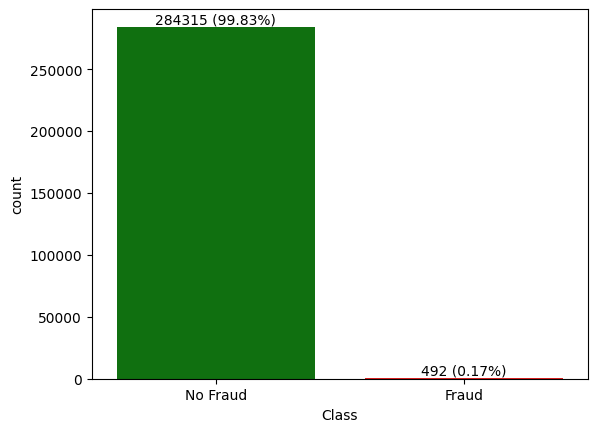

In [7]:
# How many observations do we have for Class variable?

temp_df = df.copy()
temp_df['Class'] = temp_df['Class'].map({0: 'No Fraud', 1: 'Fraud'})

sns.countplot(x='Class', data=temp_df, palette=['green', 'red'])
total_count = len(temp_df)

for bar in plt.gca().patches:
    bar_height = bar.get_height()
    percentage = (bar_height / total_count) * 100
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,
        bar_height + 0.5,
        f'{int(bar_height)} ({percentage:.2f}%)',
        ha='center',
        va='bottom'
    )

plt.show()


**Observations:**

1. As shown in above count plot, there is an imbalance in our original dataset i.e. most transactions are non-fraud. 

2. Using this as-is for predictive models could lead to errors and overfitting, as the algorithm might assume transactions are rarely fraudulent.

3. Instead, we need the model to detect patterns signaling fraud, rather than relying on such assumptions.

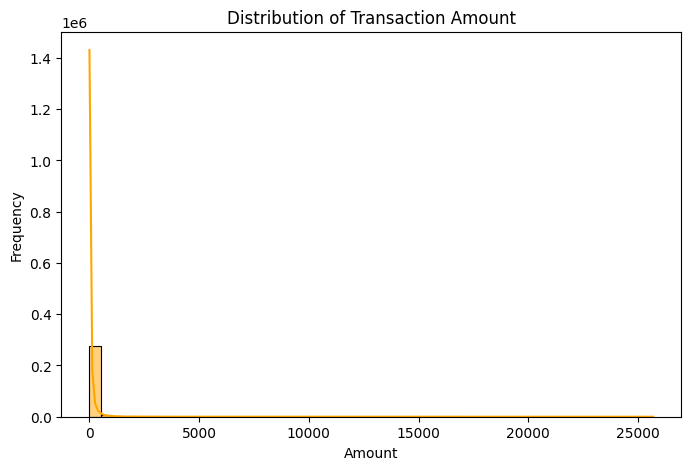

In [8]:
# What is the distribution Transaction with Amount? (Use Histogram)

plt.figure(figsize=(8, 5))
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
sns.histplot(df['Amount'], bins=50, kde=True, color='orange')
plt.show()


**Observations:**

1. From the above plot, we can infer that the majority of the transactions are below 5000. 

2. The distribution of the transaction amount is right-skewed.

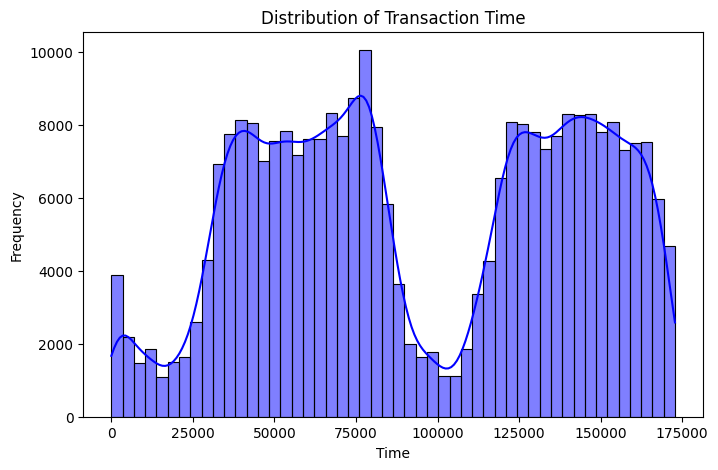

In [9]:
# What is the distribution of Transaction with Time? (Use Histogram)

plt.figure(figsize=(8, 5))
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')

sns.histplot(df['Time'], bins=50, kde=True, color='blue')

plt.show()


**Observations:**

1. The data likely covers approximately 48 hours (175,000 seconds ≈ 48.6 hours)

2. The two major peaks probably represent periods of high transaction activity during business hours on two consecutive days

3. The valley between peaks likely represents nighttime hours when transaction activity is lower

4. The smaller peak at the beginning might represent early morning transactions from the first day

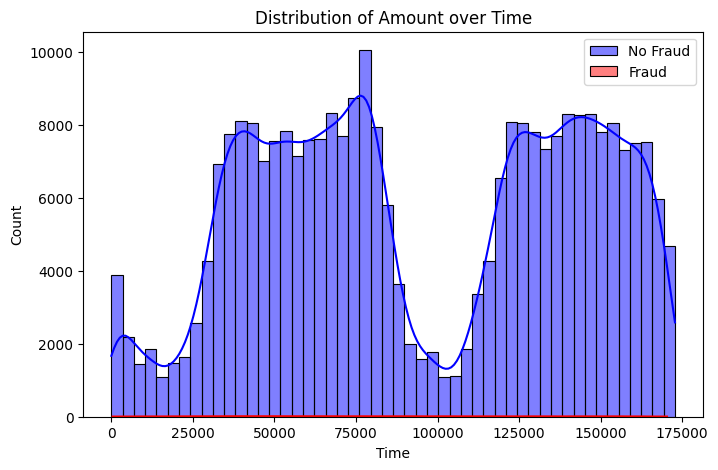

In [10]:
# What is the distribution of Amount over Time?

plt.figure(figsize=(8, 5))
plt.title('Distribution of Amount over Time')

sns.histplot(df[df['Class'] == 0]['Time'], bins=50, kde=True, color='blue', label='No Fraud')
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, kde=True, color='red', label='Fraud')

plt.legend()
plt.show()


**Observations:**

1. The red line represents the count of fraudulent transactions.

2. Fraud transactions are minimal and close to zero compared to the overwhelming number of "No Fraud" transactions. This reflects the typical imbalance in fraud datasets, where fraudulent activities are rare.

3. The near-zero counts of fraud transactions indicate a need for oversampling or advanced modeling techniques to handle this imbalance during predictive modeling.

4. The fraud activity does not appear to correlate significantly with time based on the given distribution.


---

#### **Data Scaling and Preprocessing**

---

In [11]:
# All varriable are already scaled except Time and Amount. Do we need to scale them? Yes.
# Which scaler is less sensitive to outliers? RobustScaler

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


**Dataset split into Train and Test**

In [12]:
# Let's split the data into Train and Test
# Which split algorithm is better for this data? Stratified Split (Because of Class Imbalance) or train_test_split with stratify=y

from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Train Shape: {X_train.shape}')
print(f'Test Shape: {X_test.shape}')

# Let's check the distribution of Train and Test data

train_fraud = y_train.value_counts()[1]
train_no_fraud = y_train.value_counts()[0]

test_fraud = y_test.value_counts()[1]
test_no_fraud = y_test.value_counts()[0]

print('-------------------------------')
print(f'Train Fraud: {train_fraud} ({(train_fraud / len(y_train)) * 100:.2f}%)')
print(f'Train No Fraud: {train_no_fraud} ({(train_no_fraud / len(y_train)) * 100:.2f}%)')
print('-------------------------------')
print(f'Test Fraud: {test_fraud} ({(test_fraud / len(y_test)) * 100:.2f}%)')
print(f'Test No Fraud: {test_no_fraud} ({(test_no_fraud / len(y_test)) * 100:.2f}%)')


Train Shape: (227845, 30)
Test Shape: (56962, 30)
-------------------------------
Train Fraud: 394 (0.17%)
Train No Fraud: 227451 (99.83%)
-------------------------------
Test Fraud: 98 (0.17%)
Test No Fraud: 56864 (99.83%)


---

#### **Balance the data using Under Sampling**

---

In [13]:
# !pip install imbalanced-learn

In [14]:
# As the data is highly imbalanced, we need to balance the data. Let's create a new dataframe using original data with balanced data.
# Which technique is better to balance the data? Over Sampling or Under Sampling? Under Sampling (Because of Large Data)

from imblearn.under_sampling import NearMiss

nm = NearMiss(version=3)

X_train_resample, y_train_resample = nm.fit_resample(X, y)

print(f'Train Shape: {X_train_resample.shape}')

print(f'Fraud: {y_train_resample.value_counts()[1]}')
print(f'No Fraud: {y_train_resample.value_counts()[0]}')


Train Shape: (909, 30)
Fraud: 492
No Fraud: 417


  File "c:\DevTools\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


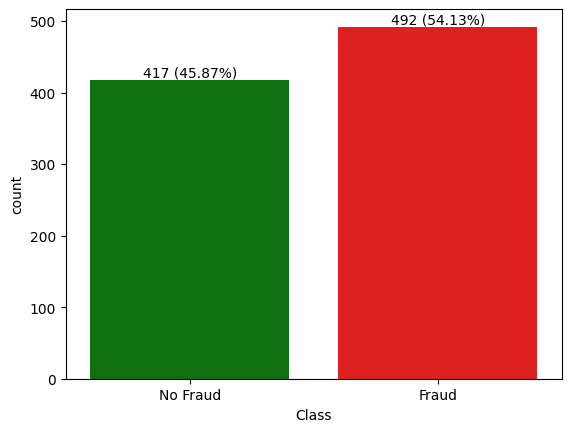

In [15]:
# Let's check the distribution of Train and Test data after balancing

temp_y_train = y_train_resample.copy()
temp_y_train = y_train_resample.map({0: 'No Fraud', 1: 'Fraud'})

sns.countplot(x=temp_y_train, palette=['green', 'red'])
total_count = len(temp_y_train)

for bar in plt.gca().patches:
    bar_height = bar.get_height()
    percentage = (bar_height / total_count) * 100
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,
        bar_height + 0.5,
        f'{int(bar_height)} ({percentage:.2f}%)',
        ha='center',
        va='bottom'
    )

plt.show()


In [16]:
# Let's creat a new dataframe using balanced data

df_resample = pd.concat([X_train_resample, y_train_resample], axis=1)


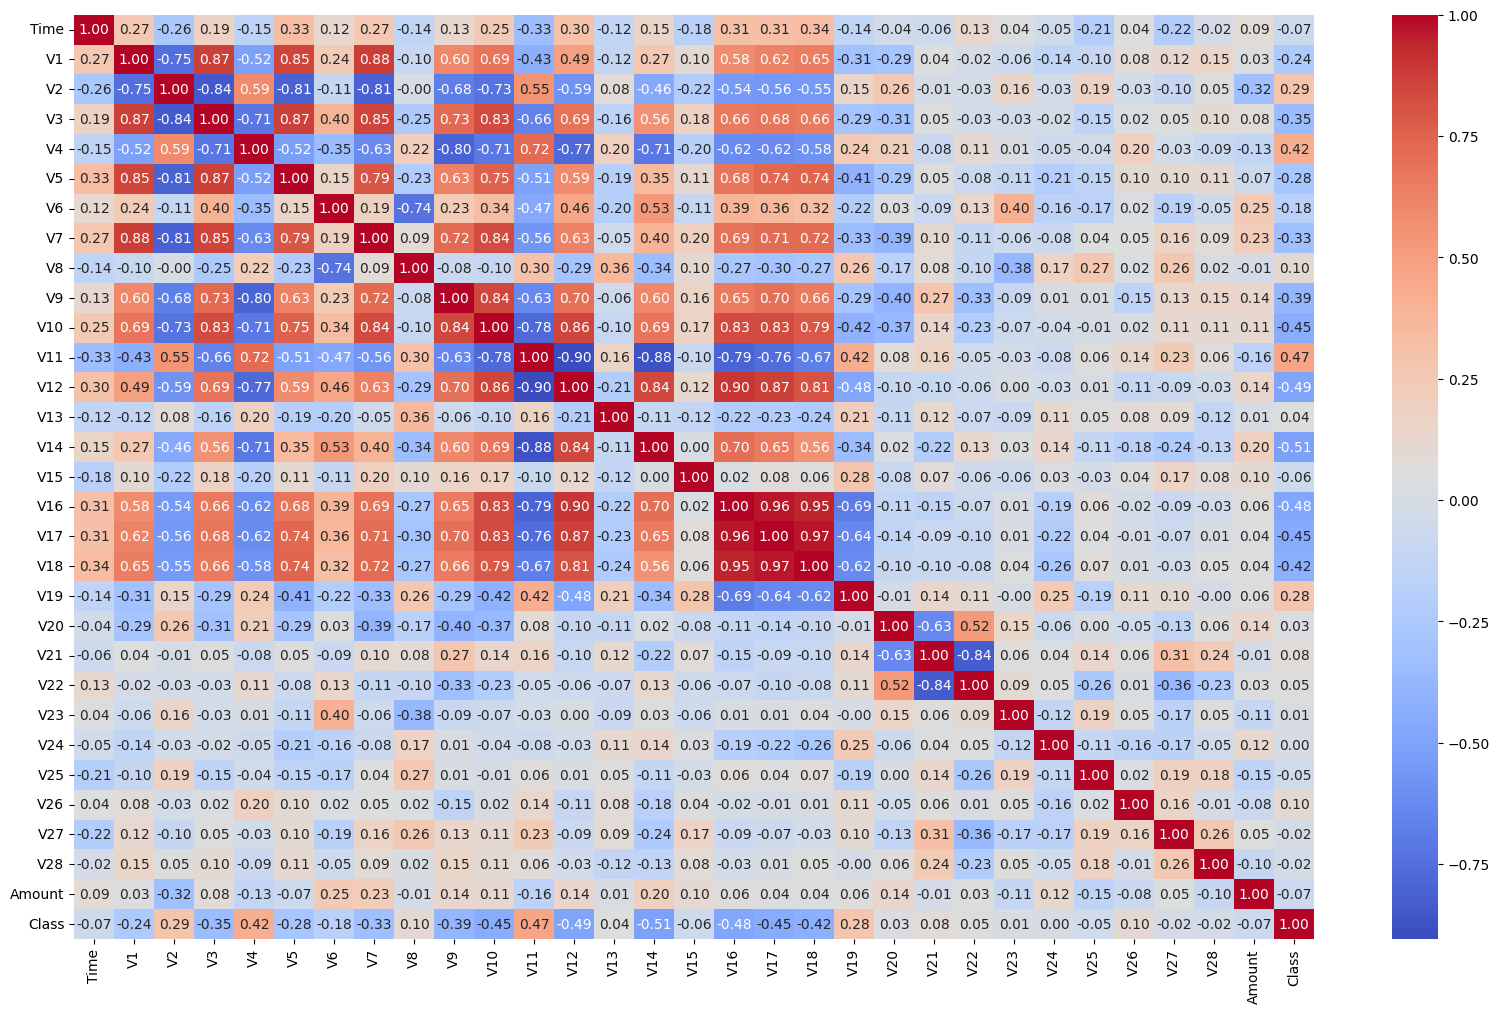

In [17]:
# Let's find out the correlation between the variables and Class. 
# This will help us to choose the best features for the model for further analysis

plt.figure(figsize=(20, 12))

sns.heatmap(df_resample.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [18]:
# Let's select the Top 5 features that are positively correlated with Class

top_5_features = df_resample.corr()['Class'].sort_values(ascending=False).head(6)
top_5_features = top_5_features.drop('Class')

top_5_features


V11    0.468301
V4     0.422993
V2     0.292261
V19    0.276457
V26    0.104306
Name: Class, dtype: float64

In [19]:
# Let's select the Top 5 features that are negatively correlated with Class

bottom_5_features = df_resample.corr()['Class'].sort_values(ascending=True).head(5)
bottom_5_features


V14   -0.514657
V12   -0.487682
V16   -0.481049
V17   -0.452464
V10   -0.450066
Name: Class, dtype: float64

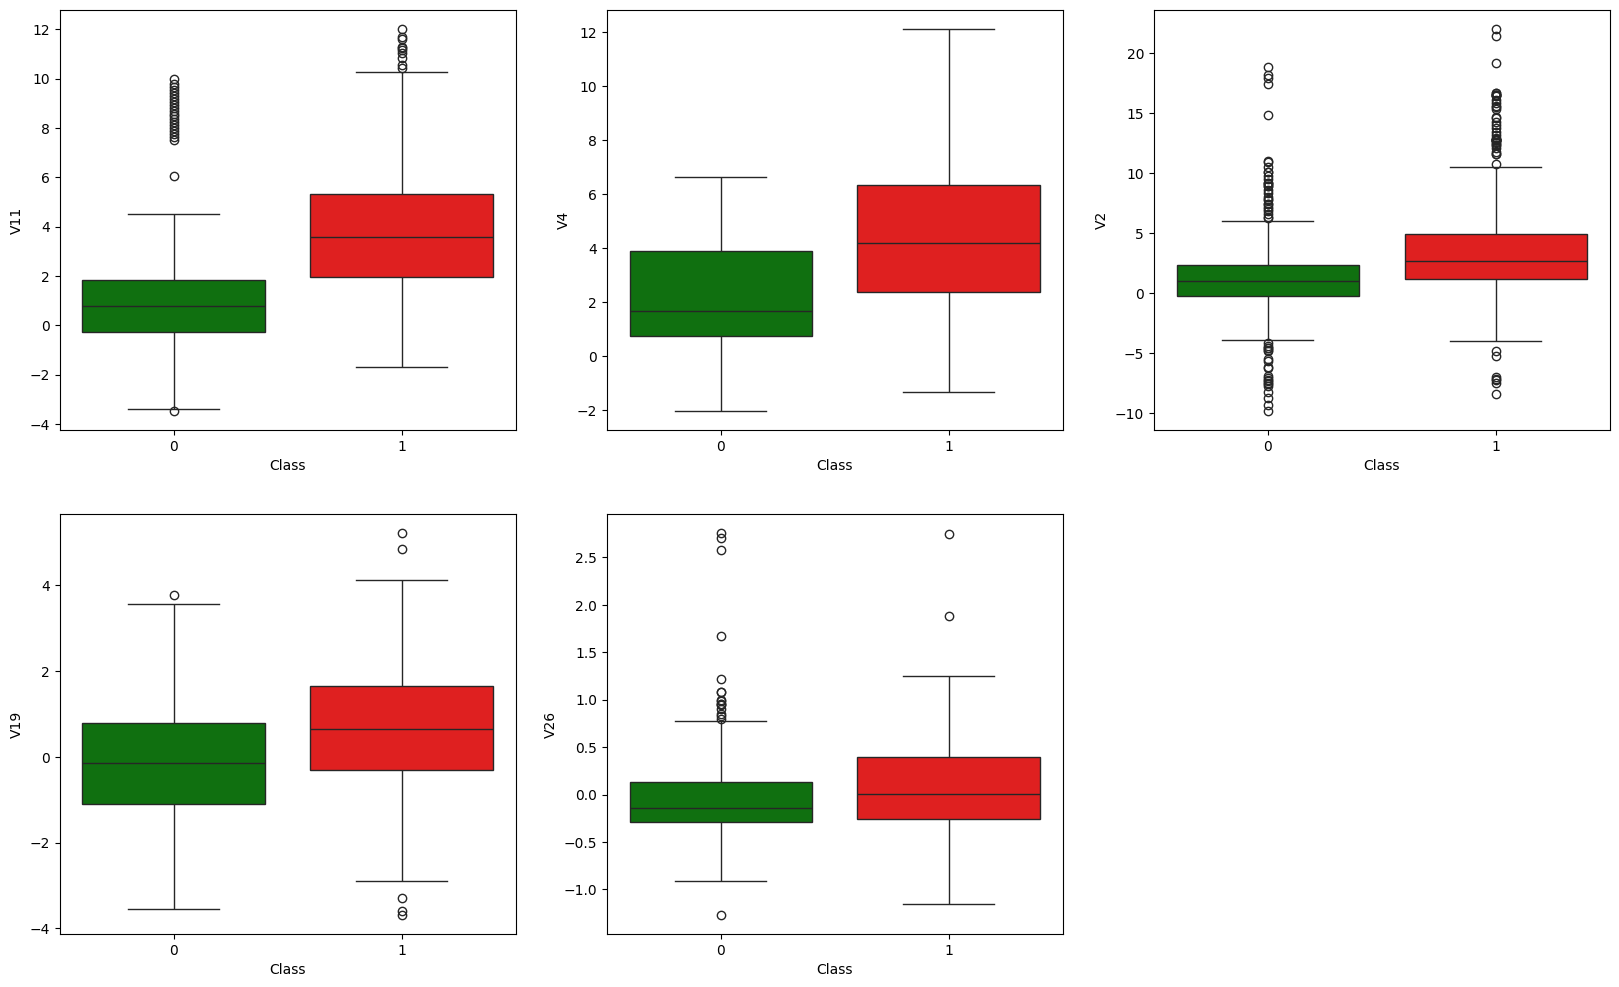

In [20]:
# Let's find the correlation between the Top 5 features with each Class using boxplot

plt.figure(figsize=(20, 12))

for i, feature in enumerate(top_5_features.index):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Class', y=feature, data=df_resample, palette=['green', 'red'])

plt.show()


**Observations:**

As shown in above plots for positively correlated variables,

1. We can see that the distribution of the data is different for both classes

2. Features sorted in the order of Gaussian Distribution with respect to class 1. V2, V4, V11, V19, V26

3. Features like V4, and V11 show strong class separation and could be crucial for fraud detection models.

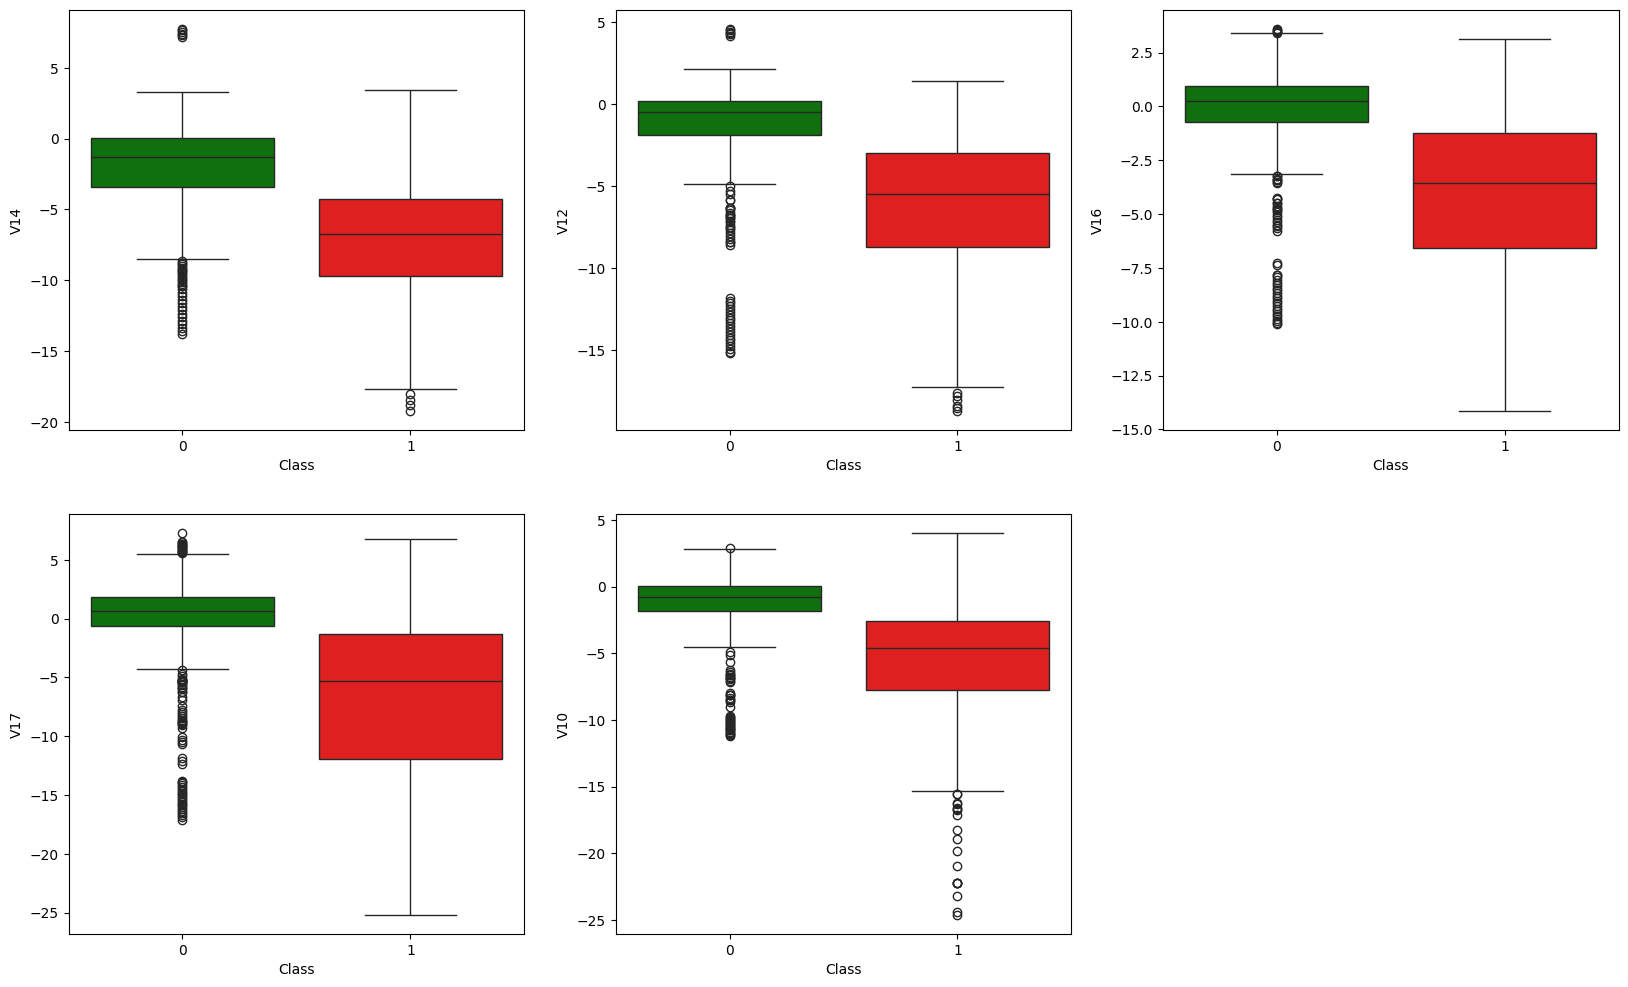

In [21]:
# Let's find the correlation between the Bottom 5 features with each Class using boxplot

plt.figure(figsize=(20, 12))

for i, feature in enumerate(bottom_5_features.index):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Class', y=feature, data=df_resample, palette=['green', 'red'])

plt.show()


**Observations:**

As shown in above plots for negatively correlated variables,

1. There are outliers in the data, so we need to remove them to improve the performance of the model.

2. We can see that the distribution of the data is different for both classes.

3. Features sorted in the order of Gaussian Distribution with respect to class -> V12, V14, V16, V17, V10

4. Features like V12, V14, V16, and V17 show strong class separation and could be crucial for fraud detection models.

In [23]:
# Let's remove outliers from the X_train and y_train using IQR method. 
# We will remove only the negatively correlated features i.e. 14, 12, 10, which has outliers for class 1. 

# For V14
Q1_V14 = df_resample[df_resample['Class'] == 1]['V14'].quantile(0.25)
Q3_V14 = df_resample[df_resample['Class'] == 1]['V14'].quantile(0.75)
IQR_V14 = Q3_V14 - Q1_V14

outliers = df_resample[(df_resample['V14'] < (Q1_V14 - 1.5 * IQR_V14)) | (df_resample['V14'] > (Q3_V14 + 1.5 * IQR_V14))].index

df_resample = df_resample.drop(outliers)
 
# For V12
Q1_V12 = df_resample[df_resample['Class'] == 1]['V12'].quantile(0.25)
Q3_V12 = df_resample[df_resample['Class'] == 1]['V12'].quantile(0.75)
IQR_V12 = Q3_V12 - Q1_V12

outliers = df_resample[(df_resample['V12'] < (Q1_V12 - 1.5 * IQR_V12)) | (df_resample['V12'] > (Q3_V12 + 1.5 * IQR_V12))].index

df_resample = df_resample.drop(outliers)

# For V10
Q1_V10 = df_resample[df_resample['Class'] == 1]['V10'].quantile(0.25)
Q3_V10 = df_resample[df_resample['Class'] == 1]['V10'].quantile(0.75)
IQR_V10 = Q3_V10 - Q1_V10

outliers = df_resample[(df_resample['V10'] < (Q1_V10 - 1.5 * IQR_V10)) | (df_resample['V10'] > (Q3_V10 + 1.5 * IQR_V10))].index

df_resample = df_resample.drop(outliers)


In [24]:
# Let's check the shape of the X_train and y_train after removing the outliers

print(f'df_resample Shape: {df_resample.shape}')


df_resample Shape: (868, 31)


---

#### **Model Training and Fine Tuning**

---

In [25]:
# Let's split the data into X_train and y_train

X_train_resample = df_resample.drop('Class', axis=1)
y_train_resample = df_resample['Class']

print(f'X_train_resample Shape: {X_train_resample.shape}')
print(f'y_train_resample Shape: {y_train_resample.shape}')


X_train_resample Shape: (868, 30)
y_train_resample Shape: (868,)


In [26]:
# Let's split the X_train_resample and y_train_resample into Train and Validation

X_train_re, X_val_re, y_train_re, y_val_re = train_test_split(X_train_resample, y_train_resample, test_size=0.2, random_state=42, stratify=y_train_resample)

In [27]:
# Let's use multiple models to find the best model for this data

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import (roc_curve, precision_score, recall_score, 
                             f1_score, roc_auc_score, precision_recall_curve, auc)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [28]:
# Let's start with initial Model parameters

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_re, y_train_re)
    y_pred_re = model.predict(X_val_re)
    
    precision = precision_score(y_val_re, y_pred_re)
    recall = recall_score(y_val_re, y_pred_re)    
    roc_auc = roc_auc_score(y_val_re, y_pred_re)

    print(f'{name} Model')
    print(f'Precision: {precision:.2f}')    
    print(f'Recall: {recall:.2f}')    
    print(f'ROC AUC: {roc_auc:.2f}')
    print('----------------------------------')
    

Logistic Regression Model
Precision: 0.84
Recall: 0.76
ROC AUC: 0.80
----------------------------------
Random Forest Model
Precision: 0.87
Recall: 0.82
ROC AUC: 0.84
----------------------------------
SVC Model
Precision: 0.90
Recall: 0.77
ROC AUC: 0.84
----------------------------------
Decision Tree Model
Precision: 0.77
Recall: 0.77
ROC AUC: 0.76
----------------------------------
KNN Model
Precision: 0.93
Recall: 0.77
ROC AUC: 0.86
----------------------------------


In [29]:
# Function uses GridSearchCV to find the best parameters for a given model.

def get_best_params(name, X_train, y_train, param_grid):
    
    model_mapping = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'SVC': SVC(),
        'Decision Tree': DecisionTreeClassifier(),
        'KNN': KNeighborsClassifier()
    }

    if name not in model_mapping:
        raise ValueError(f"Model {name} not recognized.")

    grid = GridSearchCV(model_mapping[name], param_grid=param_grid[name], n_jobs=-1, cv=5)
    grid.fit(X_train, y_train)

    print(f'{name} Model')
    print(f'Best Parameters: {grid.best_params_}')
    print(f'Best Score: {grid.best_score_:.2f}')
    print('----------------------------------')

    return grid.best_estimator_


In [30]:
# Function to evaluate a model, returning evaluation metrics.

def evaluate_model(model, X_train, y_train, X_val, y_val):
    """Fits and evaluates a model, returning evaluation metrics."""
    model.fit(X_train, y_train)    
    
    scores = cross_val_score(model, X_train, y_train, cv=5)
    
    y_pred = model.predict(X_val)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    # f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)

    return {
        "precision": precision,
        "recall": recall,
        # "f1": f1,
        "roc_auc": roc_auc,
        "cv_mean_score": scores.mean(),
        "y_pred": y_pred
    }


In [31]:
# Function to plot the ROC curve for a given model.

def plot_roc_curve(y_val, y_pred, name, roc_auc):
    """Plots the ROC curve for a given model."""
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    plt.plot(fpr, tpr, label=f'{name} ROC Curve (AUC={roc_auc:.2f})')
    

In [32]:
# Function to plot the Precision-Recall curve for a given model.

def plot_precision_recall_curve(y_val, y_pred, name):
    """Plots the Precision-Recall curve for a given model."""
    precision, recall, _ = precision_recall_curve(y_val, y_pred)
    auprc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} AUPRC Curve (AUC={auprc:.2f})')
    

In [33]:
# Main function to evaluate and plot metrics for models.

def main(models, param_grid, X_train, y_train, X_val, y_val):

    for name in models:
        model = get_best_params(name, X_train, y_train, param_grid)
        metrics = evaluate_model(model, X_train, y_train, X_val, y_val)

        print(f'{name} Model')
        print(f"Precision: {metrics['precision']:.2f}")
        print(f"Recall: {metrics['recall']:.2f}")
        # print(f"F1: {metrics['f1']:.2f}")
        print(f"ROC AUC: {metrics['roc_auc']:.2f}")
        print(f"Cross Validation Mean Score: {metrics['cv_mean_score']:.2f}")
        print('----------------------------------')

        plot_roc_curve(y_val, metrics['y_pred'], name, metrics['roc_auc'])

    # Plot ROC Curves
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 5))

    # Plot Precision-Recall Curves
    for name in models:
        model = get_best_params(name, X_train, y_train, param_grid)
        y_pred = evaluate_model(model, X_train, y_train, X_val, y_val)['y_pred']
        plot_precision_recall_curve(y_val, y_pred, name)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Area Under Precision-Recall Curve')
    plt.legend()
    plt.show()
    

---

#### **Model Evaluation**

---

In [34]:
# Let's evaluate and plot metrics for models

param_grid = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'max_iter': [100, 200, 300, 400],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [10, 20, 30, 40]
    },
    'SVC': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, 30, 40],
        'min_samples_split': [2, 4, 6, 8]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

models = {
    'Logistic Regression': None,
    'Random Forest': None,
    'SVC': None,
    'Decision Tree': None,
    'KNN': None
}


---

**Model evaluation on Resampled validation data**

Logistic Regression Model
Best Parameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.79
----------------------------------
Logistic Regression Model
Precision: 0.87
Recall: 0.74
ROC AUC: 0.81
Cross Validation Mean Score: 0.79
----------------------------------
Random Forest Model
Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.87
----------------------------------
Random Forest Model
Precision: 0.90
Recall: 0.82
ROC AUC: 0.86
Cross Validation Mean Score: 0.86
----------------------------------
SVC Model
Best Parameters: {'C': 100, 'kernel': 'rbf'}
Best Score: 0.86
----------------------------------
SVC Model
Precision: 0.87
Recall: 0.79
ROC AUC: 0.83
Cross Validation Mean Score: 0.86
----------------------------------
Decision Tree Model
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4}
Best Score: 0.81
----------------------------------
Decision Tree Model
Precision: 0.80
Recall: 0.78
ROC AUC: 0.

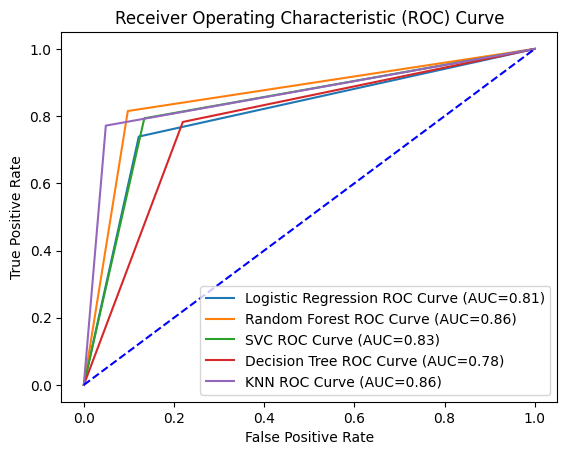

Logistic Regression Model
Best Parameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.79
----------------------------------
Random Forest Model
Best Parameters: {'max_depth': 10, 'n_estimators': 400}
Best Score: 0.87
----------------------------------
SVC Model
Best Parameters: {'C': 100, 'kernel': 'rbf'}
Best Score: 0.86
----------------------------------
Decision Tree Model
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4}
Best Score: 0.81
----------------------------------
KNN Model
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.83
----------------------------------


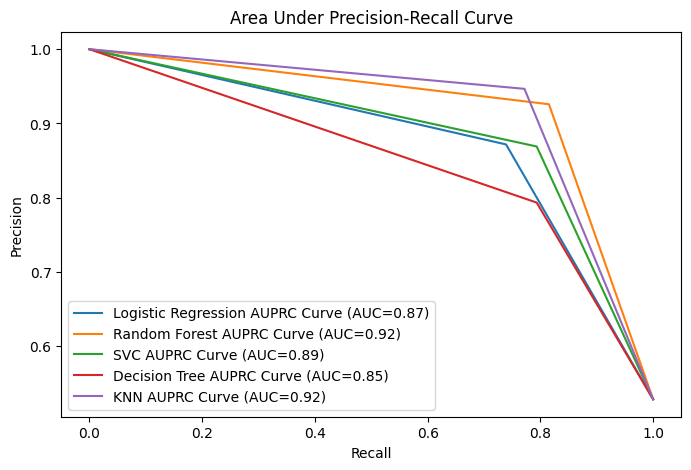

In [35]:
main(models, param_grid, X_train_re, y_train_re, X_val_re, y_val_re)


---

**Model evaluation on original training data**

Logistic Regression Model
Best Parameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.79
----------------------------------
Logistic Regression Model
Precision: 0.08
Recall: 0.78
ROC AUC: 0.88
Cross Validation Mean Score: 0.79
----------------------------------
Random Forest Model
Best Parameters: {'max_depth': 10, 'n_estimators': 400}
Best Score: 0.87
----------------------------------
Random Forest Model
Precision: 0.26
Recall: 0.94
ROC AUC: 0.97
Cross Validation Mean Score: 0.87
----------------------------------
SVC Model
Best Parameters: {'C': 100, 'kernel': 'rbf'}
Best Score: 0.86
----------------------------------
SVC Model
Precision: 0.08
Recall: 0.87
ROC AUC: 0.92
Cross Validation Mean Score: 0.86
----------------------------------
Decision Tree Model
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best Score: 0.83
----------------------------------
Decision Tree Model
Precision: 0.01
Recall: 0.94
ROC AUC: 0.

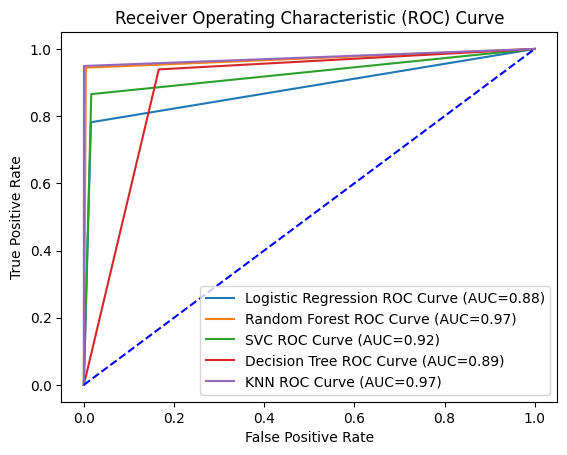

Logistic Regression Model
Best Parameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.79
----------------------------------
Random Forest Model
Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Best Score: 0.87
----------------------------------
SVC Model
Best Parameters: {'C': 100, 'kernel': 'rbf'}
Best Score: 0.86
----------------------------------
Decision Tree Model
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 6}
Best Score: 0.81
----------------------------------
KNN Model
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.83
----------------------------------


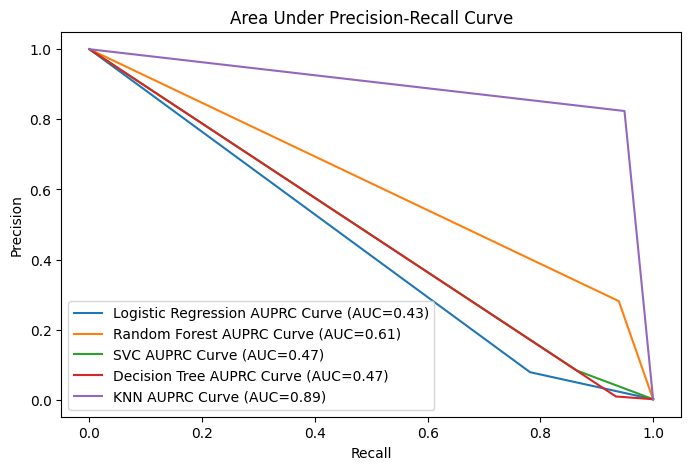

In [36]:
main(models, param_grid, X_train_re, y_train_re, X_train, y_train)


---

**Model evaluation on original test data**

Logistic Regression Model
Best Parameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.79
----------------------------------
Logistic Regression Model
Precision: 0.08
Recall: 0.81
ROC AUC: 0.90
Cross Validation Mean Score: 0.79
----------------------------------
Random Forest Model
Best Parameters: {'max_depth': 20, 'n_estimators': 300}
Best Score: 0.87
----------------------------------
Random Forest Model
Precision: 0.15
Recall: 0.96
ROC AUC: 0.98
Cross Validation Mean Score: 0.87
----------------------------------
SVC Model
Best Parameters: {'C': 100, 'kernel': 'rbf'}
Best Score: 0.86
----------------------------------
SVC Model
Precision: 0.08
Recall: 0.88
ROC AUC: 0.93
Cross Validation Mean Score: 0.86
----------------------------------
Decision Tree Model
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 6}
Best Score: 0.81
----------------------------------
Decision Tree Model
Precision: 0.01
Recall: 0.92
ROC AUC: 0.

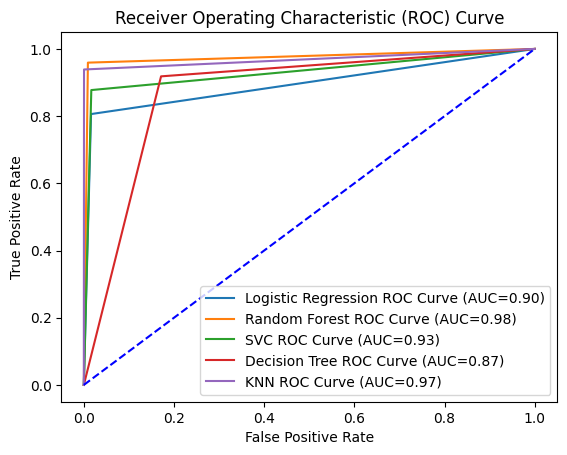

Logistic Regression Model
Best Parameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.79
----------------------------------
Random Forest Model
Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Score: 0.87
----------------------------------
SVC Model
Best Parameters: {'C': 100, 'kernel': 'rbf'}
Best Score: 0.86
----------------------------------
Decision Tree Model
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best Score: 0.81
----------------------------------
KNN Model
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.83
----------------------------------


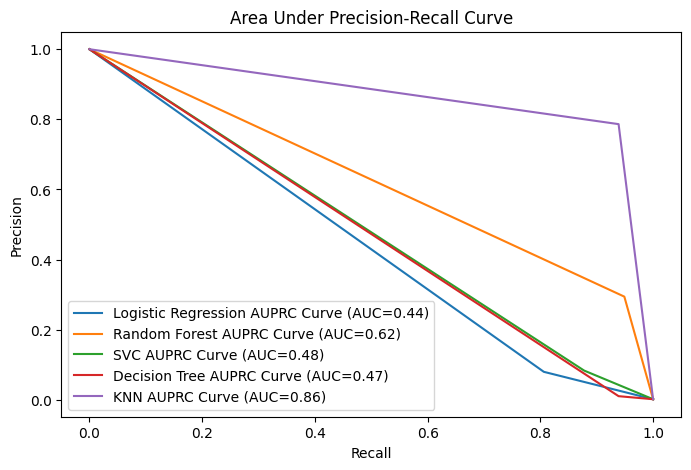

In [37]:
main(models, param_grid, X_train_re, y_train_re, X_test, y_test)


---

#### **Results**

---

We evaluated the performance of our models using three datasets:

Resampled validation data
Original training data
Original testing data

**Key Insights from the Results:**

The performance of the models, measured using ROC-AUC and AUPRC metrics, shows variability across datasets. Below is a summary of the key findings:

**K-Nearest Neighbors (KNN)** 

1. Resampled Validation Data: ROC-AUC: 0.86, AUPRC: 0.92

2. Original Training Data: ROC-AUC: 0.97, AUPRC: 0.89

3. Original Testing Data: ROC-AUC: 0.97, AUPRC: 0.86

**Random Forest** 

1. Resampled Validation Data: ROC-AUC: 0.86, AUPRC: 0.92

2. Original Training Data: ROC-AUC: 0.97, AUPRC: 0.61

3. Original Testing Data: ROC-AUC: 0.98, AUPRC: 0.62

**Support Vector Classifier** 

1. Resampled Validation Data: ROC-AUC: 0.83, AUPRC: 0.89

2. Original Training Data: ROC-AUC: 0.92, AUPRC: 0.47

3. Original Testing Data: ROC-AUC: 0.93, AUPRC: 0.48

**Logistics Regression** 

1. Resampled Validation Data: ROC-AUC: 0.81, AUPRC: 0.87

2. Original Training Data: ROC-AUC: 0.88, AUPRC: 0.43

3. Original Testing Data: ROC-AUC: 0.90, AUPRC: 0.44


---

#### **Conclusion:**

Based on the above results, the KNN model consistently demonstrates superior performance across all datasets. Its high scores for both ROC-AUC and AUPRC make it the most reliable choice for future predictions.

---